# Fisher Score- Chisquare Test For Feature Selection

Compute chi-squared stats between each non-negative feature and class.

- This score should be used to evaluate categorical variables in a classification task.

This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification. The Chi Square statistic is commonly used for testing relationships between categorical variables.

It compares the observed distribution of the different classes of target Y among the different categories of the feature, against the expected distribution of the target classes, regardless of the feature categories.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
# ['sex','embarked','alone','pclass','survived']

df = df[['sex','embarked','alone','pclass','survived']]
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


In [5]:
df.isna().sum()

sex         0
embarked    2
alone       0
pclass      0
survived    0
dtype: int64

### Always Apply `Label Encoding` On Categorical Features While Using `Chi-Square Test`

In [6]:
from sklearn.preprocessing import LabelEncoder

vals = ['sex','embarked','alone']

le = LabelEncoder()
df[vals] = df[vals].apply(le.fit_transform)

In [7]:
df

,sex,embarked,alone,pclass,survived
0,1,2,0,3,0
1,0,0,0,1,1
2,0,2,1,3,1
3,0,2,0,1,1
4,1,2,1,3,0
...,...,...,...,...,...
886,1,2,1,2,0
887,0,2,1,1,1
888,0,2,0,3,0
889,1,0,1,1,1


In [8]:
df.sex.value_counts()

1    577
0    314
Name: sex, dtype: int64

In [9]:
df.embarked.value_counts()

2    644
0    168
1     77
3      2
Name: embarked, dtype: int64

### Train Test Split To Avoid Overfitting

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df.drop('survived', axis=1), 
                                                 df['survived'], 
                                                 test_size=0.2, 
                                                 random_state=0)

In [11]:
X_train.isna().sum()

sex         0
embarked    0
alone       0
pclass      0
dtype: int64

### Perform Chi-Square Test

In [12]:
from sklearn.feature_selection import chi2

f_p_value = chi2(X_train, y_train)

f_p_value

(array([72.53037819,  5.62131258,  9.37645739, 21.06820598]),
 array([1.64480495e-17, 1.77433555e-02, 2.19789895e-03, 4.43221494e-06]))

- Higher the F_Score more important that feature is.

- Lower the P-Value more important that feature is.

### Getting all important features

In [13]:
pval = pd.Series(f_p_value[1])
pval.index = X_train.columns
pval

sex         1.644805e-17
embarked    1.774336e-02
alone       2.197899e-03
pclass      4.432215e-06
dtype: float64

In [14]:
pval.sort_values(ascending=False)

embarked    1.774336e-02
alone       2.197899e-03
pclass      4.432215e-06
sex         1.644805e-17
dtype: float64

<AxesSubplot:>

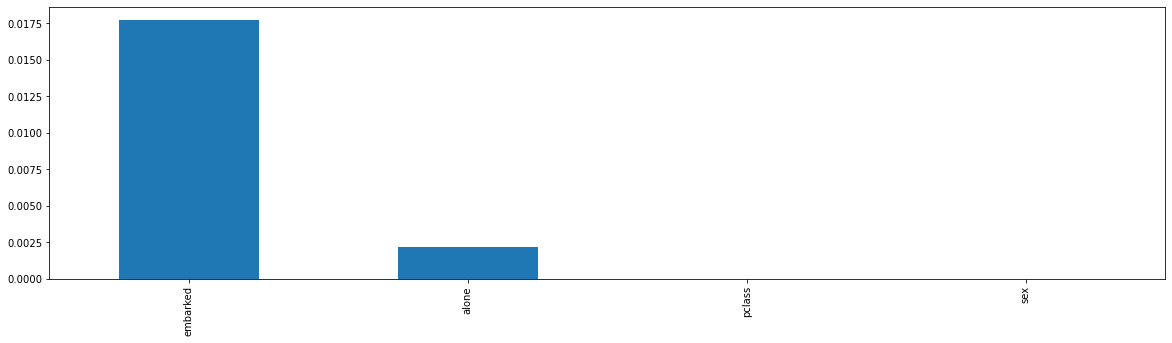

In [15]:
pval.sort_values(ascending=False).plot.bar(figsize=(20,5))